In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from collections import Counter

/Users/alh/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [43]:
def GetData2(fileName):
    return read_csv(fileName, header=0,usecols=[0,3,12,14,19,29,34])
series = GetData2('/Users/alh/Downloads/transactions-2020-01-01-2021-01-01.csv')

In [44]:
series.drop(series[series['Gross Sales'] < 1].index, inplace = True) 
    

In [45]:
series.head()

,Date,Gross Sales,Card,Cash,Fees,Description,Customer Name
0,9/4/20,75.0,75.0,0.0,-1.98,Press & Curl (Regular),Taylor Smith
1,9/4/20,75.0,85.0,0.0,-3.13,"Press & Curl (Regular), Women’s Trim (Regular)",Arielle Cowsette
4,9/4/20,110.0,0.0,110.0,0.00,Custom Amount,NaN
5,9/4/20,85.0,93.5,0.0,-3.42,"Mold & Style (Regular), Keratint Color Glaze (...",Shonda Bard
6,9/3/20,90.0,90.0,0.0,-2.35,Extensions (Glue-In) (Regular),erica dixon


In [46]:
series['Gross Sales'].mean()

82.368421052631575

In [47]:
date=series.groupby(['Date'])

In [48]:
totalbydate=date['Gross Sales'].sum()

In [49]:
dates=totalbydate.to_frame()

In [50]:
services=date['Description'].sum()

In [51]:
numberofclientsperday=series.groupby('Date').size()
clients=numberofclientsperday.to_frame()
clients.columns=(['Number of Clients'])

In [52]:
servicebydate = pd.concat([totalbydate, services,clients], axis=1, join='inner')


In [53]:
servicebydate.sort_values(by='Gross Sales',ascending=False)

,Gross Sales,Description,Number of Clients
Date,,,
8/28/20,930.0,"Root Touch Up (Regular), Women’s Haircut (Regu...",10
8/19/20,837.0,Full Sew-In (Regular)Shampoo & Blow-Dry Only (...,9
7/24/20,710.0,Custom AmountCustom AmountCustom AmountPress &...,7
7/31/20,705.0,Custom AmountCustom AmountPress & Curl (Regula...,7
8/15/20,665.0,"Women’s Trim (Regular), Color Consultation (Re...",7
7/17/20,660.0,Mold & Style (Regular)Women’s Haircut (Regular...,6
8/13/20,650.0,Extensions (Glue-In) (Regular)Press & Curl (Re...,7
9/3/20,539.0,Extensions (Glue-In) (Regular)Permanent Color ...,8
8/1/20,525.0,Custom AmountMold & Style (Regular)Press & Cur...,7


In [61]:
servicebydate.plot()

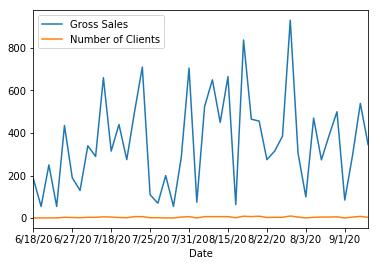

In [62]:
plt.show()

In [63]:
description=series.groupby(['Description'])

In [67]:
descr_total=description['Description'].count()

In [68]:
descr_total.to_frame()

,Description
Description,
"All-Nutrient Colorsafe Leave-in 3.4oz (Regular) - Colorsafe Leave in DETANGLER is ideal for DULL, UNMANAGEABLE HAIR. this botanical formula contains lightweight conditioners that silken and separate strands, allowing you to come right through hair. Rainforest Pequot and Buriti Fruit pack an extra punch of hydration while eliminating fly aways. Sunflower and Grape Seed Oil",1
"All-Nutrient Shine+ Gloss-mist 3.4oz (Regular), TIGI Bed Head (Regular)",1
Coils (Regular),1
"Color Consultation (Regular), Double Process (Regular), Press & Curl (Regular)",1
Custom Amount,66
"Custom Amount, Custom Amount",1
Extensions (Glue-In) (Regular),4
Full Sew-In (Regular),1
"Full Sew-In (Regular), Women’s Trim (Regular)",1


In [ ]:
desc_by_date=pd.concat(descr_total)